In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_sm
!pip install -U transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 85.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
threat_text = """
On July 25, 2024, APT29 initiated a new malware campaign using a modified version of Cobalt Strike.
The malware connects to 198.51.100.23 and downloads additional payloads.
Indicators include SHA256: d41d8cd98f00b204e9800998ecf8427e and domains like badsite.ru.
The attack exploited CVE-2024-12345, a critical RCE vulnerability in Outlook.
"""


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(threat_text)

print("📍 Named Entities Found:")
for ent in doc.ents:
    print(f"{ent.text} → {ent.label_}")


📍 Named Entities Found:
July 25, 2024 → DATE
Cobalt Strike → GPE
198.51.100.23 → CARDINAL
CVE-2024-12345 → PRODUCT
Outlook. → GPE


In [ ]:
import re

def extract_custom_indicators(text):
    ip_pattern = r"\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b"
    hash_pattern = r"\b[a-fA-F0-9]{32,64}\b"
    cve_pattern = r"CVE-\d{4}-\d{4,7}"
    domain_pattern = r"\b(?:[\w-]+\.)+[a-z]{2,}\b"

    return {
        "IP_ADDRESS": re.findall(ip_pattern, text),
        "HASH": re.findall(hash_pattern, text),
        "CVE": re.findall(cve_pattern, text),
        "DOMAIN": re.findall(domain_pattern, text)
    }

custom_entities = extract_custom_indicators(threat_text)

for label, matches in custom_entities.items():
    print(f"🔐 {label}: {matches}")


🔐 IP_ADDRESS: ['198.51.100.23']
🔐 HASH: ['d41d8cd98f00b204e9800998ecf8427e']
🔐 CVE: ['CVE-2024-12345']
🔐 DOMAIN: ['badsite.ru']


In [ ]:
print("📦 Final Entity Extraction:\n")

# SpaCy Entities
for ent in doc.ents:
    print(f"{ent.text} → {ent.label_}")

# Custom Entities
for label, matches in custom_entities.items():
    for match in matches:
        print(f"{match} → {label}")


📦 Final Entity Extraction:

July 25, 2024 → DATE
Cobalt Strike → GPE
198.51.100.23 → CARDINAL
CVE-2024-12345 → PRODUCT
Outlook. → GPE
198.51.100.23 → IP_ADDRESS
d41d8cd98f00b204e9800998ecf8427e → HASH
CVE-2024-12345 → CVE
badsite.ru → DOMAIN


In [ ]:
!pip install feedparser newspaper3k


In [ ]:
!pip install newspaper3k --upgrade
!pip install lxml[html_clean]


In [ ]:
import feedparser
from newspaper import Article

def get_articles_from_rss(rss_url, limit=3):
    feed = feedparser.parse(rss_url)
    articles = []

    for entry in feed.entries[:limit]:
        try:
            a = Article(entry.link)
            a.download()
            a.parse()
            articles.append({
                "title": entry.title,
                "link": entry.link,
                "text": a.text
            })
        except Exception as e:
            print(f"❌ Error fetching article: {entry.link}\n{e}")

    return articles


In [ ]:
rss_url = "https://threatpost.com/feed/"
articles = get_articles_from_rss(rss_url, limit=2)  # Increase limit if needed


In [ ]:
for article in articles:
    print(f"\n📰 {article['title']}")
    print(f"🔗 {article['link']}\n")

    text = article['text']
    doc = nlp(text)
    custom_entities = extract_custom_indicators(text)

    print("📦 Final Entity Extraction:\n")
    for ent in doc.ents:
        print(f"{ent.text} → {ent.label_}")
    for label, matches in custom_entities.items():
        for match in matches:
            print(f"{match} → {label}")



📰 Student Loan Breach Exposes 2.5M Records
🔗 https://threatpost.com/student-loan-breach-exposes-2-5m-records/180492/

📦 Final Entity Extraction:

2.5 million → CARDINAL
the Oklahoma Student Loan Authority → ORG
over 2.5 million → CARDINAL
Nelnet Servicing → ORG
Lincoln → ORG
Neb.-based → CARDINAL
OSLA → ORG
EdFinancial → ORG
July 21, 2022 → DATE
third → ORDINAL
August 17th → DATE
2,501,324 → CARDINAL
Nelnet → ORG
Bill Munn → PERSON
Maine → GPE
2022 → DATE
July 22, 2022 → DATE
July 21 → DATE
August 17, 2022 → DATE
July 21, 2022 → DATE
Nelnet Servicing → ORG
LLC → ORG
Nelnet → ORG
August 17, 2022 → DATE
June 2022 → DATE
July 22, 2022 → DATE
Nelnet → ORG
Melissa Bischoping → PERSON
Tanium → ORG
Last week → DATE
Biden → PERSON
10,000 → MONEY
Nelnet Servicing → ORG
Nelnet Servicing’s → ORG
third → ORDINAL
two years → DATE
up to $1 million → MONEY

📰 Watering Hole Attacks Push ScanBox Keylogger
🔗 https://threatpost.com/watering-hole-attacks-push-scanbox-keylogger/180490/

📦 Final Entity Ext

In [ ]:
!pip install openai


In [ ]:
!pip install transformers


In [ ]:
from transformers import pipeline

# Load the summarization model (can take a few seconds the first time)
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def summarize_article(text):
    # Hugging Face models can have a max token limit — trim long text
    trimmed_text = text[:1024]

    summary = summarizer(trimmed_text, max_length=130, min_length=30, do_sample=False)
    return summary[0]['summary_text']


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


In [ ]:
for article in articles:
    print(f"\n📰 {article['title']}")
    print(f"🔗 {article['link']}\n")

    text = article['text']
    doc = nlp(text)
    custom_entities = extract_custom_indicators(text)

    print("📦 Entity Extraction:")
    for ent in doc.ents:
        print(f"{ent.text} → {ent.label_}")
    for label, matches in custom_entities.items():
        for match in matches:
            print(f"{match} → {label}")

    print("\n📝 Auto Summary:")
    try:
        summary = summarize_article(text)
        print(summary)
    except Exception as e:
        print(f"❌ Summary error: {e}")



📰 Student Loan Breach Exposes 2.5M Records
🔗 https://threatpost.com/student-loan-breach-exposes-2-5m-records/180492/

📦 Entity Extraction:
2.5 million → CARDINAL
the Oklahoma Student Loan Authority → ORG
over 2.5 million → CARDINAL
Nelnet Servicing → ORG
Lincoln → ORG
Neb.-based → CARDINAL
OSLA → ORG
EdFinancial → ORG
July 21, 2022 → DATE
third → ORDINAL
August 17th → DATE
2,501,324 → CARDINAL
Nelnet → ORG
Bill Munn → PERSON
Maine → GPE
2022 → DATE
July 22, 2022 → DATE
July 21 → DATE
August 17, 2022 → DATE
July 21, 2022 → DATE
Nelnet Servicing → ORG
LLC → ORG
Nelnet → ORG
August 17, 2022 → DATE
June 2022 → DATE
July 22, 2022 → DATE
Nelnet → ORG
Melissa Bischoping → PERSON
Tanium → ORG
Last week → DATE
Biden → PERSON
10,000 → MONEY
Nelnet Servicing → ORG
Nelnet Servicing’s → ORG
third → ORDINAL
two years → DATE
up to $1 million → MONEY

📝 Auto Summary:
2.5 million people were affected by the breach. Names, email addresses, phone numbers and social security numbers were exposed. The bre

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

def export_to_markdown(article, entities, summary, folder_path="/content/drive/MyDrive/CyberNERReports"):
    import os  # add this at the top of the cell if it's not already there

    title = article['title']
    link = article['link']
    filename = f"{title[:50].replace(' ', '_').replace('/', '_')}.md"
    filepath = os.path.join(folder_path, filename)

    # ✅ Create the folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)

    with open(filepath, 'w') as f:
        f.write(f"# {title}\n\n")
        f.write(f"🔗 [Source Link]({link})\n\n")

        f.write("## 📦 Extracted Entities\n")
        for label, values in entities.items():
            if values:
                f.write(f"**{label}**: {', '.join(set(values))}\n\n")

        f.write("## 📝 Auto Summary\n")
        f.write(summary.strip() + "\n")

    print(f"✅ Saved report: {filepath}")



In [ ]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4
import os

def export_to_pdf(article, entities, summary, folder_path="/content/drive/MyDrive/CyberNERReports"):
    os.makedirs(folder_path, exist_ok=True)

    title = article['title']
    link = article['link']
    filename = title.replace(" ", "_").replace(":", "").replace("/", "_") + ".pdf"
    filepath = os.path.join(folder_path, filename)

    doc = SimpleDocTemplate(filepath, pagesize=A4)
    styles = getSampleStyleSheet()
    story = []

    story.append(Paragraph(f"<b>{title}</b>", styles['Title']))
    story.append(Spacer(1, 12))
    story.append(Paragraph(f"<a href='{link}'>{link}</a>", styles['Normal']))
    story.append(Spacer(1, 12))

    story.append(Paragraph("<b>📦 Extracted Entities:</b>", styles['Heading2']))
    for label, items in entities.items():
        story.append(Paragraph(f"<b>{label}:</b> {', '.join(set(items))}", styles['Normal']))
        story.append(Spacer(1, 6))

    story.append(Spacer(1, 12))
    story.append(Paragraph("<b>📝 Summary:</b>", styles['Heading2']))
    story.append(Paragraph(summary, styles['Normal']))

    doc.build(story)
    print(f"✅ Exported to PDF: {filepath}")


In [ ]:
!pip freeze > requirements.txt


In [ ]:
!pip install reportlab


In [ ]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet
import os

def export_to_pdf(article, entities, summary, folder_path="/content/drive/MyDrive/CyberNERReports"):
    title = article['title'].replace(" ", "_").replace("/", "_")
    filename = f"{title}.pdf"
    filepath = os.path.join(folder_path, filename)

    doc = SimpleDocTemplate(filepath)
    styles = getSampleStyleSheet()
    story = []

    story.append(Paragraph(f"<b>{article['title']}</b>", styles["Title"]))
    story.append(Paragraph(f"<a href='{article['link']}'>{article['link']}</a>", styles["Normal"]))
    story.append(Spacer(1, 12))

    story.append(Paragraph("<b>📦 Entity Extraction:</b>", styles["Heading2"]))
    for label, values in entities.items():
        values_str = ', '.join(values) if values else "None"
        story.append(Paragraph(f"<b>{label}:</b> {values_str}", styles["Normal"]))
        story.append(Spacer(1, 6))

    story.append(Spacer(1, 12))
    story.append(Paragraph("<b>📝 Auto Summary:</b>", styles["Heading2"]))
    story.append(Paragraph(summary if summary else "N/A", styles["Normal"]))

    doc.build(story)
    print(f"✅ PDF saved to {filepath}")


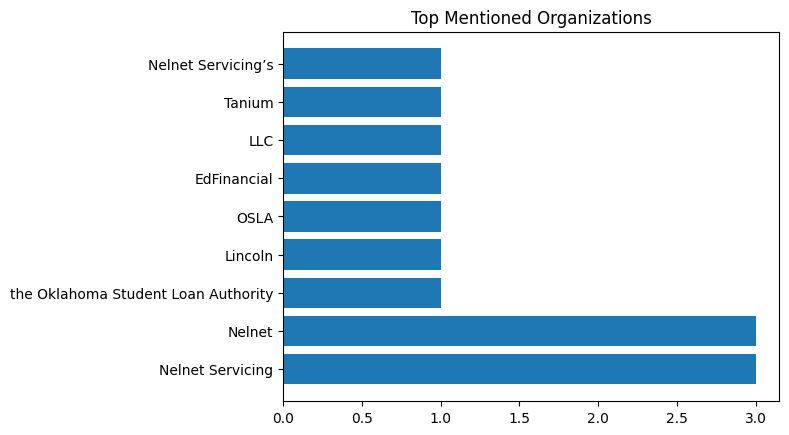

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

org_counts = Counter(all_entities['ORG'])
plt.barh(*zip(*org_counts.most_common(10)))
plt.title("Top Mentioned Organizations")
plt.show()


In [ ]:
!pip install transformers datasets sentence-transformers faiss-cpu


In [ ]:

from sentence_transformers import SentenceTransformer
from transformers import pipeline
import numpy as np
import faiss
import textwrap

# 🧠 1. Load QA model
qa = pipeline("question-answering", model="deepset/roberta-base-squad2")

# 📚 2. Sample documents (you can expand this or load from files)
docs = [
    {
        "title": "Student Loan Breach",
        "content": "Over 2.5 million people were affected by the breach. Names, email addresses, phone numbers and social security numbers were exposed. The breach was discovered on August 17th."
    },
    {
        "title": "ScanBox Keylogger",
        "content": "APT TA423 used watering hole attacks to distribute the ScanBox keylogger across Southeast Asia. The malware collected browser data and system info and was linked to China."
    },
    {
        "title": "Okta Breach",
        "content": "Hackers breached Okta’s support case management system. The attackers were able to view uploaded HTTP Archive files containing session tokens."
    }
]

# 🔍 3. Embeddings + FAISS
embedder = SentenceTransformer("all-MiniLM-L6-v2")
doc_texts = [d['content'] for d in docs]
doc_embeddings = embedder.encode(doc_texts)
index = faiss.IndexFlatL2(doc_embeddings[0].shape[0])
index.add(np.array(doc_embeddings))

# 🔁 4. Ask in real-time
def ask(question):
    q_embed = embedder.encode([question])
    _, I = index.search(q_embed, k=1)
    top_doc = docs[I[0][0]]

    print(f"\n🔗 Matched Document: {top_doc['title']}")
    print(f"\n📖 Context:\n{textwrap.fill(top_doc['content'], 80)}")

    result = qa(question=question, context=top_doc['content'])
    print(f"\n❓ Q: {question}")
    print(f"✅ A: {result['answer']}")

# 🗣️ 5. Interactive loop
while True:
    try:
        q = input("\nAsk a cybersecurity question (or type 'exit'): ")
        if q.lower() in ['exit', 'quit']:
            break
        ask(q)
    except KeyboardInterrupt:
        break


Device set to use cuda:0



🔗 Matched Document: Okta Breach

📖 Context:
Hackers breached Okta’s support case management system. The attackers were able
to view uploaded HTTP Archive files containing session tokens.

❓ Q: What do you do?
✅ A: breached Okta’s support case management system
